In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

In [2]:
customers = pd.read_csv("../../data/processed/customer.csv")
digital_usage = pd.read_csv("../../data/processed/digital_usage.csv")
engagement = pd.read_csv("../../data/processed/engagement_details.csv")
loans = pd.read_csv("../../data/processed/loans.csv")
products = pd.read_csv("../../data/processed/products_owned.csv")
transactions = pd.read_csv("../../data/processed/transactions.csv")
segments = pd.read_csv("../../customer_segmentation/customer_segments.csv")

#### **Data Inspection & Preparation**

##### Customers Dataset

In [3]:
df = pd.merge(segments, customers, on = 'customer_id')

In [4]:
print("Dimensions:", df.shape)
df.head()

Dimensions: (4000, 14)


,customer_id,Segment,age,job,marital,education,default,balance,debt,income,tenure,nps,dependents,customer_lifetime_value
0,166,At risk / inactive customers,34,housemaid,married,secondary,1,-949.60,21543.11,1374.91,36,9,1,138.09
1,139,At risk / inactive customers,33,student,single,tertiary,1,-29.70,15544.08,2462.65,36,10,0,176.30
2,484,At risk / inactive customers,36,retired,married,primary,1,-251.33,5830.96,2039.61,34,8,2,158.50
3,508,Budget-conscious,19,unemployed,single,primary,1,-97.86,6248.55,1958.32,9,1,2,88.93
4,119,At risk / inactive customers,32,retired,married,secondary,1,-104.72,136880.43,1753.37,36,10,3,378.42


In [5]:
print("DataFrame Structure:")
df.info()

DataFrame Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              4000 non-null   int64  
 1   Segment                  4000 non-null   object 
 2   age                      4000 non-null   int64  
 3   job                      4000 non-null   object 
 4   marital                  4000 non-null   object 
 5   education                4000 non-null   object 
 6   default                  4000 non-null   int64  
 7   balance                  4000 non-null   float64
 8   debt                     4000 non-null   float64
 9   income                   4000 non-null   float64
 10  tenure                   4000 non-null   int64  
 11  nps                      4000 non-null   int64  
 12  dependents               4000 non-null   int64  
 13  customer_lifetime_value  4000 non-null   float64
dtypes: 

In [6]:
print("Descriptive Statistics:")
print(df.drop('customer_id', axis=1).describe())
df.head()

Descriptive Statistics:
               age      default        balance           debt        income  \
count  4000.000000  4000.000000    4000.000000    4000.000000   4000.000000   
mean     40.081250     0.161250    2073.729380   26193.090233   4988.717868   
std      10.304814     0.367807   10237.815197   24686.013983   3328.249888   
min      18.000000     0.000000  -13496.110000    1200.550000      0.000000   
25%      32.000000     0.000000      62.587500   10810.467500   2752.815000   
50%      40.000000     0.000000     354.385000   18914.930000   4208.705000   
75%      47.000000     0.000000    1327.600000   32454.275000   6285.190000   
max      73.000000     1.000000  337116.210000  327747.160000  35129.550000   

            tenure          nps   dependents  customer_lifetime_value  
count  4000.000000  4000.000000  4000.000000              4000.000000  
mean     32.531250     6.850250     2.372750               338.426807  
std       7.849454     3.479346     1.309861    

,customer_id,Segment,age,job,marital,education,default,balance,debt,income,tenure,nps,dependents,customer_lifetime_value
0,166,At risk / inactive customers,34,housemaid,married,secondary,1,-949.60,21543.11,1374.91,36,9,1,138.09
1,139,At risk / inactive customers,33,student,single,tertiary,1,-29.70,15544.08,2462.65,36,10,0,176.30
2,484,At risk / inactive customers,36,retired,married,primary,1,-251.33,5830.96,2039.61,34,8,2,158.50
3,508,Budget-conscious,19,unemployed,single,primary,1,-97.86,6248.55,1958.32,9,1,2,88.93
4,119,At risk / inactive customers,32,retired,married,secondary,1,-104.72,136880.43,1753.37,36,10,3,378.42


In [7]:
# converting categorical variables to category data type
categorical_columns = ['job', 'marital', 'education']
for col in categorical_columns:
    df[col] = df[col].astype('category')

# categorizing nps
nps_bins = [-float('inf'), 6, 8, 10]
nps_labels = ['detractor', 'passive', 'promoter']
df['nps_category'] = pd.cut(df['nps'], bins=nps_bins, labels=nps_labels)

# removing nps column
df.drop(['nps'], axis=1, inplace=True)

# applying log transformation to balance, debt, and income
df['log_balance'] = np.sign(df['balance']) * np.log1p(np.abs(df['balance']))
df['log_debt'] = np.log1p(df['debt'])
df['log_income'] = np.log1p(df['income'])

# creating debt-to-income ratio column
df['debt_to_income'] = df['log_debt'] / df['log_income']

# creating balance-to-debt ratio column
df['balance_to_debt'] = df['log_balance'] / df['log_debt']

In [8]:
print(df[['log_balance', 'log_debt', 'log_income', 'debt_to_income', 'balance_to_debt']].describe())

       log_balance     log_debt   log_income  debt_to_income  balance_to_debt
count  4000.000000  4000.000000  4000.000000     4000.000000      4000.000000
mean      4.466015     9.838670     8.320328             inf         0.459960
std       4.501250     0.823333     0.660819             NaN         0.458464
min      -9.510231     7.091368     0.000000        0.794411        -0.977382
25%       4.152417     9.288363     7.920742        1.095173         0.431762
50%       5.873202     9.847759     8.345148        1.179199         0.599310
75%       7.191880    10.387618     8.746110        1.268075         0.731508
max      12.728186    12.700001    10.466826             inf         1.325888


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


In [9]:
print("Job Distribution:")
print(df['job'].value_counts())

Job Distribution:
job
entrepreneur     539
unknown          449
self-employed    437
management       394
technician       378
blue-collar      332
admin.           325
services         321
housemaid        300
retired          246
student          155
unemployed       124
Name: count, dtype: int64


In [10]:
print("Marital Status Distribution:")
print(df['marital'].value_counts())

Marital Status Distribution:
marital
married     2318
single      1230
divorced     452
Name: count, dtype: int64


In [11]:
print("Education Distribution:")
print(df['education'].value_counts())

Education Distribution:
education
secondary    2040
tertiary     1174
primary       610
unknown       176
Name: count, dtype: int64


##### Segments Dataset

In [12]:
print("Dimensions", segments.shape)
segments.head()

Dimensions (4000, 2)


,customer_id,Segment
0,166,At risk / inactive customers
1,139,At risk / inactive customers
2,484,At risk / inactive customers
3,508,Budget-conscious
4,119,At risk / inactive customers


In [13]:
print("Segment Distribution:")
print(segments['Segment'].value_counts())

Segment Distribution:
Segment
At risk / inactive customers    2106
Budget-conscious                1440
High-value                       454
Name: count, dtype: int64


#### Products Dataset

In [14]:
print("Dimensions:", segments.shape)
products.head()

Dimensions: (4000, 2)


,customer_id,has_investment_product,has_credit_card,has_home_loan,has_personal_loan,has_fixed_deposit,has_insurance
0,166,0,1,1,0,0,0
1,139,1,1,0,0,0,0
2,484,0,1,0,0,0,0
3,508,0,0,0,0,1,0
4,119,0,1,0,0,0,0


In [15]:
print("DataFrame Structure:")
products.info()

DataFrame Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   customer_id             4000 non-null   int64
 1   has_investment_product  4000 non-null   int64
 2   has_credit_card         4000 non-null   int64
 3   has_home_loan           4000 non-null   int64
 4   has_personal_loan       4000 non-null   int64
 5   has_fixed_deposit       4000 non-null   int64
 6   has_insurance           4000 non-null   int64
dtypes: int64(7)
memory usage: 218.9 KB


In [16]:
print("Investment Distribution:")
print(products['has_investment_product'].value_counts())

print("\nCredit Card Distribution:")
print(products['has_credit_card'].value_counts())

print("\nHome Loan Distribution:")
print(products['has_home_loan'].value_counts())

print("\nPersonal Loan Distribution:")
print(products['has_personal_loan'].value_counts())

print("\nFixed Deposit Distribution:")
print(products['has_fixed_deposit'].value_counts())

print("\nInsurance Distribution:")
print(products['has_insurance'].value_counts())

Investment Distribution:
has_investment_product
0    2997
1    1003
Name: count, dtype: int64

Credit Card Distribution:
has_credit_card
1    2803
0    1197
Name: count, dtype: int64

Home Loan Distribution:
has_home_loan
0    3865
1     135
Name: count, dtype: int64

Personal Loan Distribution:
has_personal_loan
0    2873
1    1127
Name: count, dtype: int64

Fixed Deposit Distribution:
has_fixed_deposit
0    3175
1     825
Name: count, dtype: int64

Insurance Distribution:
has_insurance
0    2743
1    1257
Name: count, dtype: int64


In [17]:
df = df.merge(products, on = 'customer_id')

#### Loans Dataset

In [18]:
print("Dimensions:", loans.shape)
loans.head()

Dimensions: (7920, 6)


,loan_id,customer_id,loan_amount,loan_purpose,due_date,paid_off_date
0,1,1716,10000.0,credit_card,2027-05-27,2024-05-28
1,2,1884,17000.0,other,2027-04-18,NaN
2,3,749,3000.0,credit_card,2026-06-03,NaN
3,4,511,21000.0,major_purchase,2026-03-09,2024-10-15
4,5,428,12000.0,credit_card,2027-03-26,NaN


In [19]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   loan_id        7920 non-null   int64  
 1   customer_id    7920 non-null   int64  
 2   loan_amount    7909 non-null   float64
 3   loan_purpose   7920 non-null   object 
 4   due_date       7920 non-null   object 
 5   paid_off_date  6336 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 371.4+ KB


In [20]:
loans['due_date'] = pd.to_datetime(loans['due_date'])
loans['paid_off_date'] = pd.to_datetime(loans['paid_off_date'])
loans['days_past_due'] = (loans['paid_off_date'] - loans['due_date']).dt.days
loans['days_past_due'] = loans['days_past_due'].fillna(0)
loans.drop(['due_date', 'paid_off_date'], axis=1, inplace=True)

In [21]:
loans.head()

,loan_id,customer_id,loan_amount,loan_purpose,days_past_due
0,1,1716,10000.0,credit_card,-1094.0
1,2,1884,17000.0,other,0.0
2,3,749,3000.0,credit_card,0.0
3,4,511,21000.0,major_purchase,-510.0
4,5,428,12000.0,credit_card,0.0


In [22]:
loans.describe()

,loan_id,customer_id,loan_amount,days_past_due
count,7920.000000,7920.000000,7909.000000,7920.000000
mean,3960.500000,1999.999621,12510.121381,-730.982576
std,2286.451399,1163.464687,7866.365185,421.932315
min,1.000000,1.000000,1000.000000,-1454.000000
25%,1980.750000,989.750000,6000.000000,-1049.000000
50%,3960.500000,1976.500000,10000.000000,-823.000000
75%,5940.250000,3023.500000,17000.000000,-547.000000
max,7920.000000,4000.000000,35000.000000,0.000000


In [23]:
print("Loan Purpose Distribution:")
print(loans['loan_purpose'].value_counts())

Loan Purpose Distribution:
loan_purpose
debt_consolidation    4110
credit_card           1491
housing-related        642
other                  615
major_purchase         312
small_business         295
car                    128
wedding                115
medical                 90
vacation                75
educational             47
Name: count, dtype: int64


In [24]:
def categorize_loan_purpose(purpose):
    if purpose == 'debt_consolidation':
        return 'Debt Management'
    elif purpose == 'credit_card':
        return 'Credit Product'
    elif purpose in ['housing-related', 'major_purchase', 'car']:
        return 'Asset Acquisition'
    elif purpose in ['small_business', 'educational']:
        return 'Business & Education'
    elif purpose in ['wedding', 'vacation', 'medical']:
        return 'Lifestyle & Personal'
    else:
        return 'Miscellaneous'  

loans['loan_category'] = loans['loan_purpose'].apply(categorize_loan_purpose)

print("Loan Category Distribution:")
print(loans['loan_category'].value_counts())

Loan Category Distribution:
loan_category
Debt Management         4110
Credit Product          1491
Asset Acquisition       1082
Miscellaneous            615
Business & Education     342
Lifestyle & Personal     280
Name: count, dtype: int64


In [25]:
df = df.merge(loans, on = 'customer_id')

##### Transactions Dataset

In [26]:
print("Dimensions:", transactions.shape)
transactions.head()

Dimensions: (5044, 5)


,transaction_id,customer_id,transaction_type,transaction_amt,transaction_date
0,253265,1603,Credit,764.93,2024-08-04 06:48:53
1,472773,2700,Deposit,1069.99,2023-12-03 23:26:54
2,521017,2700,Transfer,1378.95,2024-09-12 20:27:52
3,548048,2700,Withdrawal,1784.64,2024-06-05 17:42:06
4,890348,2700,Withdrawal,1061.30,2023-12-19 16:24:32


In [27]:
print("DataFrame Structure:")
transactions.info()

DataFrame Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5044 entries, 0 to 5043
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    5044 non-null   int64  
 1   customer_id       5044 non-null   int64  
 2   transaction_type  5044 non-null   object 
 3   transaction_amt   5044 non-null   float64
 4   transaction_date  5044 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 197.2+ KB


In [28]:
transactions['transaction_type'] = transactions['transaction_type'].astype('category')
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'])
transactions['transaction_date'] = transactions['transaction_date'].dt.date
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'])


In [29]:
print("Transaction Type Distribution:")
print(transactions['transaction_type'].value_counts())

Transaction Type Distribution:
transaction_type
Withdrawal    1300
Credit        1293
Transfer      1251
Deposit       1200
Name: count, dtype: int64


In [30]:
print(transactions[['transaction_amt']].describe())

       transaction_amt
count      5044.000000
mean        429.229304
std         382.898524
min           2.000000
25%         178.852500
50%         330.790000
75%         558.100000
max        4984.380000


In [31]:
# creating a new column 'money_flow' to classify transaction types
def classify_money_flow(tx_type):
    if tx_type in ['Credit', 'Deposit']:
        return 'Money In'
    else:
        return 'Money Out'

transactions['money_flow'] = transactions['transaction_type'].apply(classify_money_flow)

In [32]:
df = df.merge(transactions, on = 'customer_id')

##### Digital Usage Dataset

In [33]:
print("Dimensions:", digital_usage.shape)
digital_usage.head()

Dimensions: (4000, 9)


,customer_id,has_mobile_app,has_web_account,mobile_logins_wk,web_logins_wk,avg_mobile_time,avg_web_time,last_mobile_use,last_web_use
0,1987,1,1,1.0,2.0,7.00,15.91,2024-11-08,2024-11-10
1,2,0,1,NaN,6.0,NaN,2.32,NaN,2024-03-06
2,3,1,1,12.0,9.0,1.78,1.71,2023-07-22,2024-03-26
3,4,1,1,12.0,3.0,1.55,8.19,2024-09-15,2024-09-25
4,5,1,1,4.0,0.0,5.78,0.00,2024-10-18,2023-02-17


In [34]:
print("DataFrame Structure:")
digital_usage.info()

DataFrame Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       4000 non-null   int64  
 1   has_mobile_app    4000 non-null   int64  
 2   has_web_account   4000 non-null   int64  
 3   mobile_logins_wk  2920 non-null   float64
 4   web_logins_wk     3520 non-null   float64
 5   avg_mobile_time   2920 non-null   float64
 6   avg_web_time      3520 non-null   float64
 7   last_mobile_use   2920 non-null   object 
 8   last_web_use      3520 non-null   object 
dtypes: float64(4), int64(3), object(2)
memory usage: 281.4+ KB


In [35]:
digital_usage['last_mobile_use'] = pd.to_datetime(digital_usage['last_mobile_use'])
digital_usage['last_web_use'] = pd.to_datetime(digital_usage['last_web_use'])

In [36]:
df = df.merge(digital_usage, on = 'customer_id')

#### **NPS Across Customer Segments**

In [37]:
nps_segment_dist = pd.crosstab(df['Segment'], df['nps_category'], normalize='index') * 100
print(nps_segment_dist)

nps_category                  detractor    passive   promoter
Segment                                                      
At risk / inactive customers  30.246914  21.604938  48.148148
Budget-conscious              31.604096  21.843003  46.552901
High-value                    21.502591  29.792746  48.704663


<Figure size 800x600 with 0 Axes>

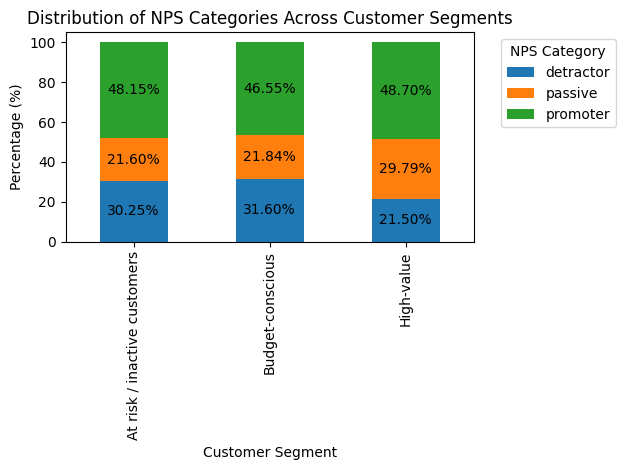

In [38]:
plt.figure(figsize=(8, 6))
ax = nps_segment_dist.plot(kind='bar', stacked=True)
plt.title('Distribution of NPS Categories Across Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Percentage (%)')
plt.legend(title='NPS Category', bbox_to_anchor=(1.05, 1), loc='upper left')

for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    y = p.get_y() + height / 2
    ax.annotate(f'{height:.2f}%', (x, y), ha='center', va='center', color='black', fontsize=10)

plt.tight_layout()
plt.show()

**Key insights:**

- High-value customers show strong loyalty but need focus on converting passives. 

- Budget-conscious customers have the highest dissatisfaction, signaling value gaps. 

- At-risk/inactive customers are polarized, reflecting uneven retention success. 

- Passives across segments represent a key opportunity to boost advocacy through tailored incentives and improved engagement.

#### **Financial Health Across Customer Segments**

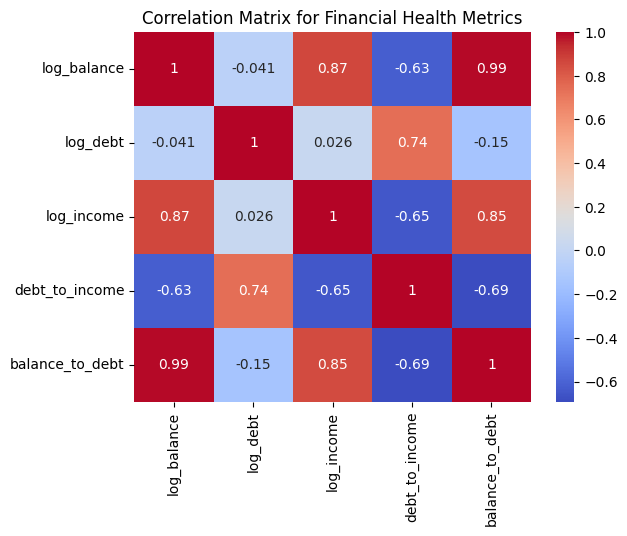

In [39]:
variables = ['log_balance', 'log_debt', 'log_income', 'debt_to_income', 'balance_to_debt']
correlation_matrix = df[variables].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Financial Health Metrics')
plt.show()

**Key insights:**  

Higher income and savings (**log_income** and **log_balance**) strongly correlate with improved financial health metrics like **balance_to_debt**, while rising debt (**log_debt**) worsens **debt_to_income** ratios. Notably, income growth and savings accumulation counteract debt burdens, suggesting that boosting income and reducing debt are critical for financial stability. The near-perfect link between **log_balance** and **balance_to_debt** underscores savings as a key lever for debt management.

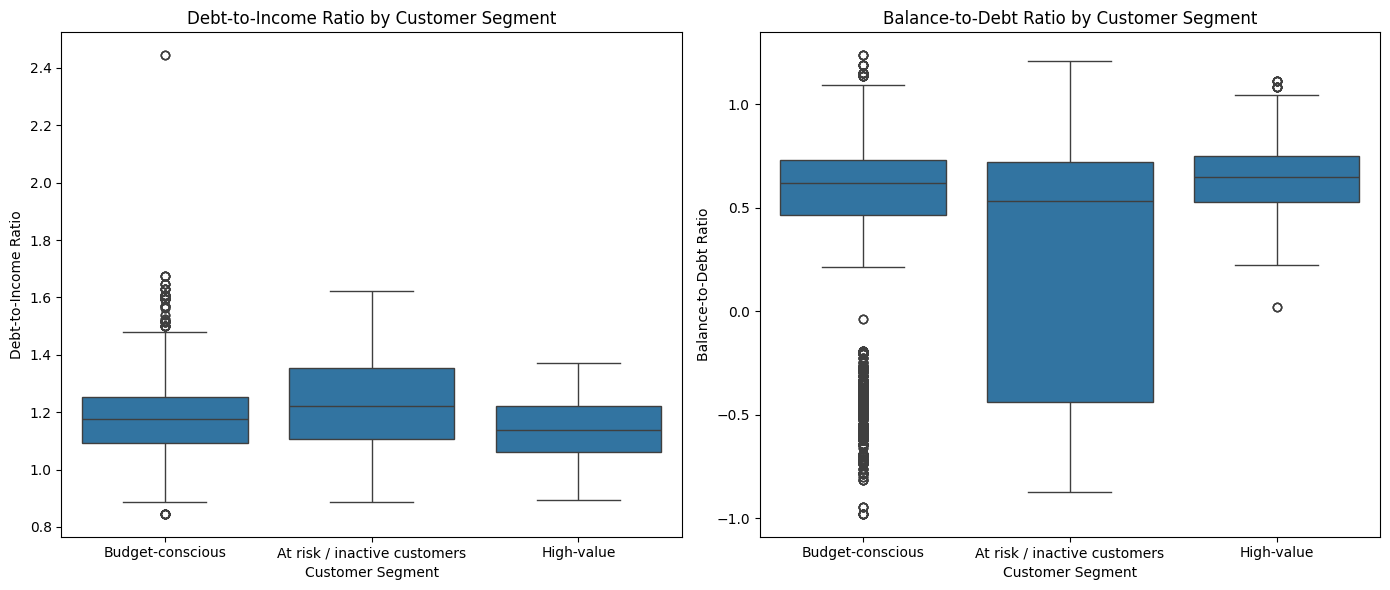

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# boxplot for debt-to-income ratio
sns.boxplot(x='Segment', y='debt_to_income', data=df, ax=ax[0])
ax[0].set_title('Debt-to-Income Ratio by Customer Segment')
ax[0].set_xlabel('Customer Segment')
ax[0].set_ylabel('Debt-to-Income Ratio')

# boxplot for balance-to-debt ratio
sns.boxplot(x='Segment', y='balance_to_debt', data=df, ax=ax[1])
ax[1].set_title('Balance-to-Debt Ratio by Customer Segment')
ax[1].set_xlabel('Customer Segment')
ax[1].set_ylabel('Balance-to-Debt Ratio')

plt.tight_layout()
plt.show()

**Key insights:**

- At-risk customers need urgent debt relief interventions such as restructuring and financial counseling.

- Budget-conscious segments would benefit from income-boosting tools or debt consolidation offers.

- High-value customers should be retained with loyalty programs reinforcing their financial stability.

C:\Users\Admin\AppData\Local\Temp\ipykernel_14772\3574731504.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=on_time_proportion.index, y=on_time_proportion.values, palette='viridis')


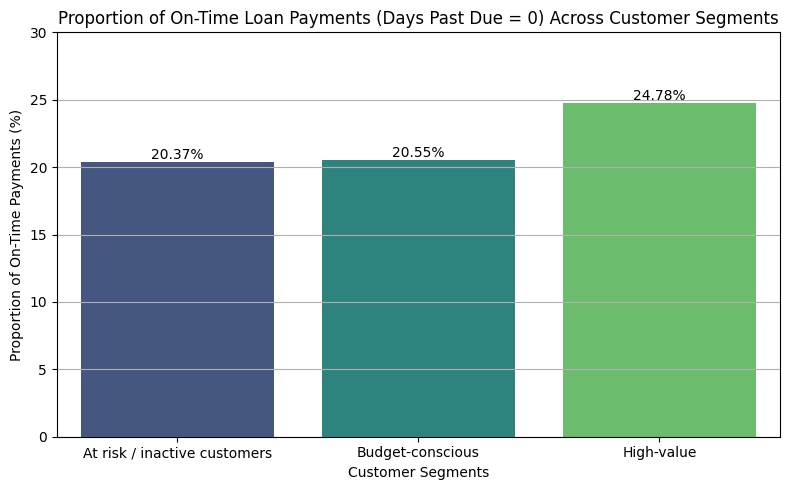

In [41]:
# filtering data for customers with days_past_due = 0
on_time = df[df['days_past_due'] == 0]

# calculating the proportion of on-time payers in each segment
on_time_counts = on_time.groupby('Segment').size()
total_counts = df.groupby('Segment').size()
on_time_proportion = (on_time_counts / total_counts) * 100

# bar plot showing the proportion of customers with on-time loan payments for each segment
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=on_time_proportion.index, y=on_time_proportion.values, palette='viridis')
plt.title('Proportion of On-Time Loan Payments (Days Past Due = 0) Across Customer Segments')
plt.xlabel('Customer Segments')
plt.ylabel('Proportion of On-Time Payments (%)')
plt.ylim(0, 30)
plt.grid(axis='y')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                color='black', fontsize=10, 
                xytext=(0, 5), textcoords='offset points')  # Adjust label position slightly above the bar

plt.tight_layout()
plt.show()

**Key insights:**  

- High-value customers likely show the highest proportion of on-time loan payments, reflecting financial stability and reliability.

- Budget-conscious customers may exhibit moderate on-time payment rates, balancing frugality with potential cash flow constraints. 

- At-risk/inactive customers likely have the lowest on-time payment rates, aligning with their high debt burdens and financial strain. 

These trends emphasize the need for segment-specific strategies, such as flexible repayment plans for at-risk customers and loyalty incentives for high-value clients, to improve payment behavior and retention.

In [42]:
# loan categorization distribution by segment
loan_cat_percent = pd.crosstab(df['Segment'], df['loan_category'], normalize='index') * 100
print(loan_cat_percent)

loan_category                 Asset Acquisition  Business & Education  \
Segment                                                                 
At risk / inactive customers          11.728395              4.526749   
Budget-conscious                      14.800910              4.607509   
High-value                            25.129534              6.563040   

loan_category                 Credit Product  Debt Management  \
Segment                                                         
At risk / inactive customers       20.370370        53.497942   
Budget-conscious                   19.032992        51.797497   
High-value                         18.134715        37.305699   

loan_category                 Lifestyle & Personal  Miscellaneous  
Segment                                                            
At risk / inactive customers              2.263374       7.613169  
Budget-conscious                          2.605233       7.155859  
High-value                          

**Key Insights:**  

- High-value customers prioritize **asset acquisition** and **business & education loans**, reflecting growth-focused financial behavior.

- At-risk and budget-conscious segments rely heavily on **debt management loans**, highlighting financial stress. 

- Lifestyle/personal loans are minimally used, suggesting limited discretionary borrowing. 

Tailored strategies, such as debt relief for stressed segments and premium investment products for high-value customers, are critical to address distinct priorities.

#### **Product Usage Across Customer Segments**

In [43]:
product_columns = ['has_investment_product', 'has_credit_card', 'has_home_loan', 
                   'has_personal_loan', 'has_fixed_deposit', 'has_insurance']

usage_summary = df.groupby('Segment')[product_columns].mean()
print("Product Usage Proportions by Segment:")
print(usage_summary)


Product Usage Proportions by Segment:
                              has_investment_product  has_credit_card  \
Segment                                                                 
At risk / inactive customers                0.222222         0.567901   
Budget-conscious                            0.237884         0.715700   
High-value                                  0.365285         0.746114   

                              has_home_loan  has_personal_loan  \
Segment                                                          
At risk / inactive customers       0.043210           0.438272   
Budget-conscious                   0.068601           0.414334   
High-value                         0.274611           0.551813   

                              has_fixed_deposit  has_insurance  
Segment                                                         
At risk / inactive customers           0.203704       0.228395  
Budget-conscious                       0.196587       0.297611  
High-

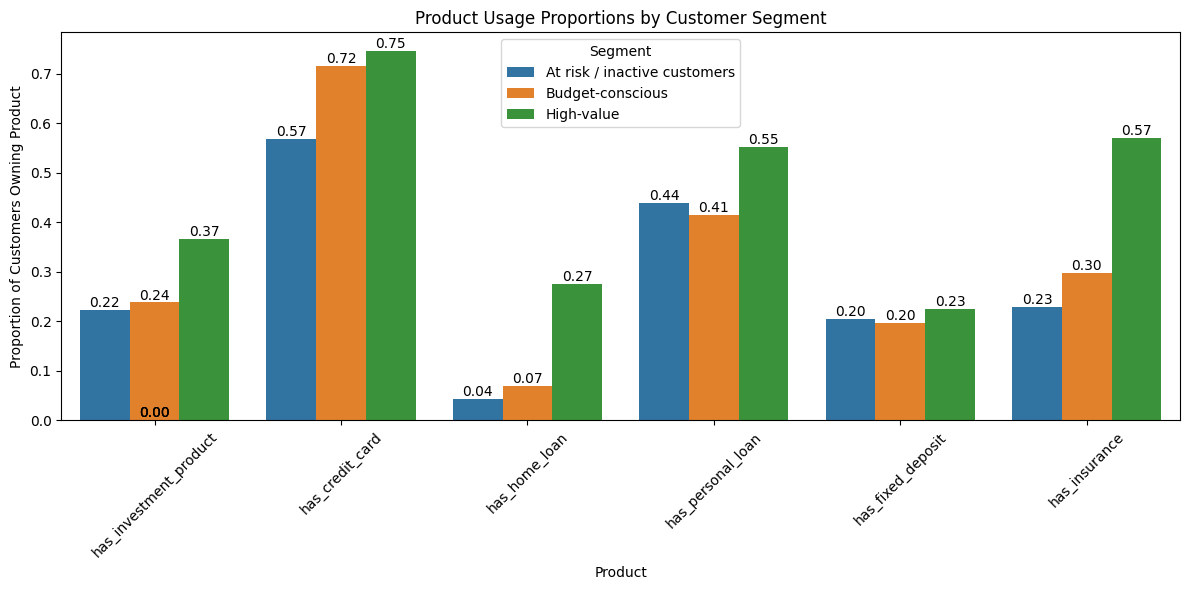

In [44]:
# barplot of product usage proportions by segment
usage_summary_reset = usage_summary.reset_index()
usage_melted = usage_summary_reset.melt(id_vars='Segment', 
                                         var_name='Product', 
                                         value_name='Proportion')

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=usage_melted, x='Product', y='Proportion', hue='Segment')
plt.title('Product Usage Proportions by Customer Segment')
plt.ylabel('Proportion of Customers Owning Product')
plt.xlabel('Product')
plt.legend(title='Segment')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                color='black', fontsize=10, 
                xytext=(0, 5), textcoords='offset points')  # Adjust label position slightly above the bar

plt.tight_layout()
plt.show()

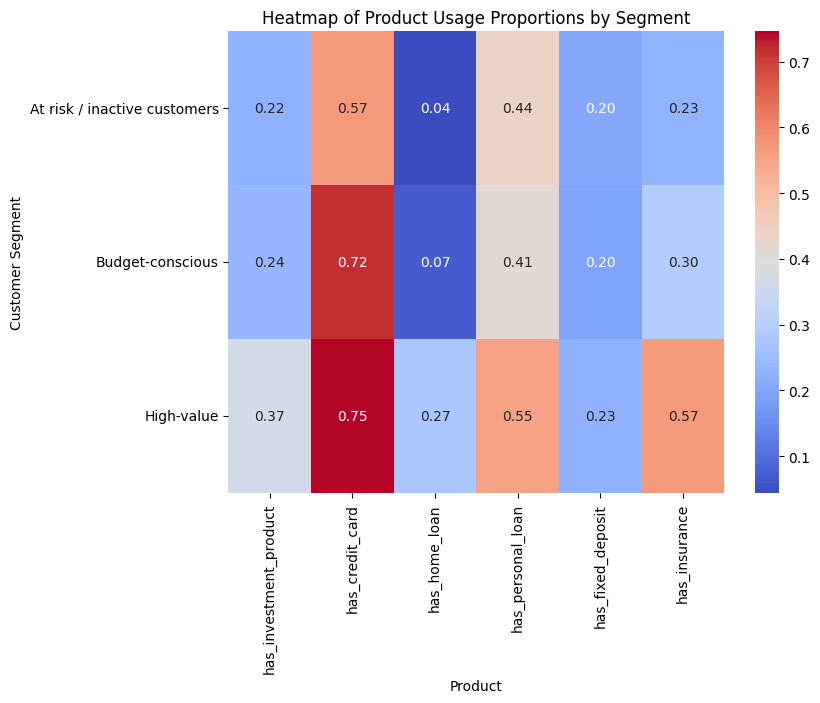

In [45]:
# heatmap of product usage proportion by segment
plt.figure(figsize=(8, 6))
sns.heatmap(usage_summary, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Product Usage Proportions by Segment')
plt.ylabel('Customer Segment')
plt.xlabel('Product')
plt.show()

In [46]:
# chi-square test for the statistical significance in difference in usage across segments
for product in product_columns:
    print(f"Chi-Square Test for {product}")
    
    ct = pd.crosstab(df['Segment'], df[product])
    print("Contingency Table:")
    print(ct)
    
    chi2, p, dof, expected = stats.chi2_contingency(ct)

    print(f"Chi-square Statistic: {chi2:.4f}")
    print(f"Degrees of Freedom: {dof}")
    print(f"p-value: {p:.4f}")
    print("Expected Frequencies:")
    print(expected)
    
    if p < 0.05:
        print("=> The difference in usage across segments is statistically significant.")
    else:
        print("=> The difference in usage across segments is not statistically significant.")

Chi-Square Test for has_investment_product
Contingency Table:
has_investment_product           0     1
Segment                                 
At risk / inactive customers   378   108
Budget-conscious              6699  2091
High-value                     735   423
Chi-square Statistic: 90.5600
Degrees of Freedom: 2
p-value: 0.0000
Expected Frequencies:
[[ 363.87119034  122.12880966]
 [6581.12708453 2208.87291547]
 [ 867.00172513  290.99827487]]
=> The difference in usage across segments is statistically significant.
Chi-Square Test for has_credit_card
Contingency Table:
has_credit_card                  0     1
Segment                                 
At risk / inactive customers   210   276
Budget-conscious              2499  6291
High-value                     294   864
Chi-square Statistic: 56.3927
Degrees of Freedom: 2
p-value: 0.0000
Expected Frequencies:
[[ 139.87521564  346.12478436]
 [2529.84186314 6260.15813686]
 [ 333.28292122  824.71707878]]
=> The difference in usage acros

**Summary of key findings:**

- High-value customers show strong adoption of premium products (credit cards, insurance, home loans), reflecting financial stability and diverse needs.

- Budget-conscious customers prioritize essentials (credit cards, personal loans) but underutilize investments, signaling a focus on affordability. 

- At-risk customers rely heavily on personal loans and lack in savings/insurance, highlighting debt-driven financial stress. 

- Fixed deposits show no significant segment differences, acting as a universal safe option.

Marketing can be tailored to upsell premium services for high-value customers, promote debt management tools for at-risk groups, and incentivize savings/credit products for budget-conscious users to align with segment-specific behaviors and needs.

#### **Transaction History Across Customer Segments**

In [47]:
# count of transactions per segment
tx_counts = df.groupby('Segment').size().reset_index(name='tx_count')
print(tx_counts)

                        Segment  tx_count
0  At risk / inactive customers       486
1              Budget-conscious      8790
2                    High-value      1158


In [48]:
# transaction count per customer
customer_tx = df.groupby(['customer_id', 'Segment']).size().reset_index(name='tx_count')

# the average transaction count per segment
avg_tx_count_by_segment = customer_tx.groupby('Segment')['tx_count'].mean().reset_index()

print(avg_tx_count_by_segment)

                        Segment   tx_count
0  At risk / inactive customers   3.446809
1              Budget-conscious   9.341126
2                    High-value  10.432432


In [49]:
# cross-tabulation for the distribution of transaction types across segments
tx_type_distribution = pd.crosstab(df['Segment'], df['transaction_type'])
print(tx_type_distribution)

# the frequency of each transaction type for every customer segment, with the counts normalized row-wise
tx_type_percent = pd.crosstab(df['Segment'], df['transaction_type'], normalize='index') * 100
print(tx_type_percent)

transaction_type              Credit  Deposit  Transfer  Withdrawal
Segment                                                            
At risk / inactive customers     105      126       138         117
Budget-conscious                2241     2214      2091        2244
High-value                       279      288       291         300
transaction_type                 Credit    Deposit   Transfer  Withdrawal
Segment                                                                  
At risk / inactive customers  21.604938  25.925926  28.395062   24.074074
Budget-conscious              25.494881  25.187713  23.788396   25.529010
High-value                    24.093264  24.870466  25.129534   25.906736


In [50]:
# cross-tabulation for the distribution of money flow across segments
flow_distribution = pd.crosstab(df['Segment'], df['money_flow'])
print(flow_distribution)

flow_percent = pd.crosstab(df['Segment'], df['money_flow'], normalize='index') * 100
print(flow_percent)

money_flow                    Money In  Money Out
Segment                                          
At risk / inactive customers       231        255
Budget-conscious                  4455       4335
High-value                         567        591
money_flow                     Money In  Money Out
Segment                                           
At risk / inactive customers  47.530864  52.469136
Budget-conscious              50.682594  49.317406
High-value                    48.963731  51.036269


C:\Users\Admin\AppData\Local\Temp\ipykernel_14772\1342700653.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_tx_count_by_segment, x='Segment', y='tx_count', palette='viridis', ax=ax[0])


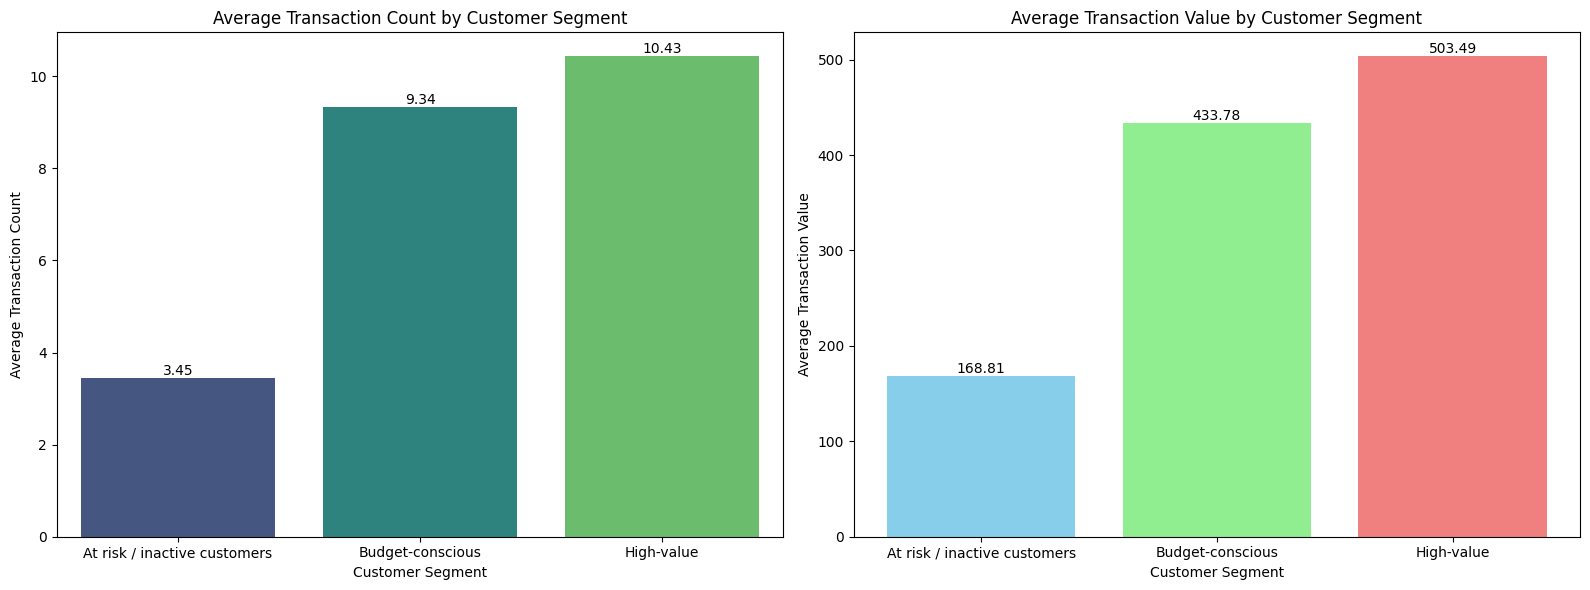

In [51]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# barplot for average transaction count by segment
sns.barplot(data=avg_tx_count_by_segment, x='Segment', y='tx_count', palette='viridis', ax=ax[0])
ax[0].set_xlabel('Customer Segment')
ax[0].set_ylabel('Average Transaction Count')
ax[0].set_title('Average Transaction Count by Customer Segment')

for p in ax[0].patches:
    ax[0].annotate(f'{p.get_height():.2f}', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   color='black', fontsize=10, 
                   xytext=(0, 5), textcoords='offset points') 

# barplot for average transaction value by segment
avg_transaction_value = df.groupby('Segment')['transaction_amt'].mean().reset_index()
bars = ax[1].bar(avg_transaction_value['Segment'], avg_transaction_value['transaction_amt'], 
                 color=['skyblue', 'lightgreen', 'lightcoral'])
ax[1].set_xlabel('Customer Segment')
ax[1].set_ylabel('Average Transaction Value')
ax[1].set_title('Average Transaction Value by Customer Segment')

for bar in bars:
    ax[1].text(bar.get_x() + bar.get_width() / 2, 
               bar.get_height(), 
               f'{bar.get_height():.2f}', 
               ha='center', 
               va='bottom', 
               fontsize=10, 
               color='black')

plt.tight_layout()
plt.show()

In [ ]:
# grouping the data by segment and money_flow, and summing the transaction amounts
money_summary = df.groupby(['Segment', 'money_flow'])['transaction_amt'].sum().reset_index()

# calculating the percentage of each money_flow type within each segment
money_summary['percentage'] = money_summary.groupby('Segment')['transaction_amt'].transform(lambda x: x / x.sum() * 100)

# calculating the percentage of transaction counts for money in vs. money out across segments
flow_percent.reset_index(inplace=True)
flow_percent_melted = flow_percent.melt(id_vars='Segment', var_name='money_flow', value_name='percentage')

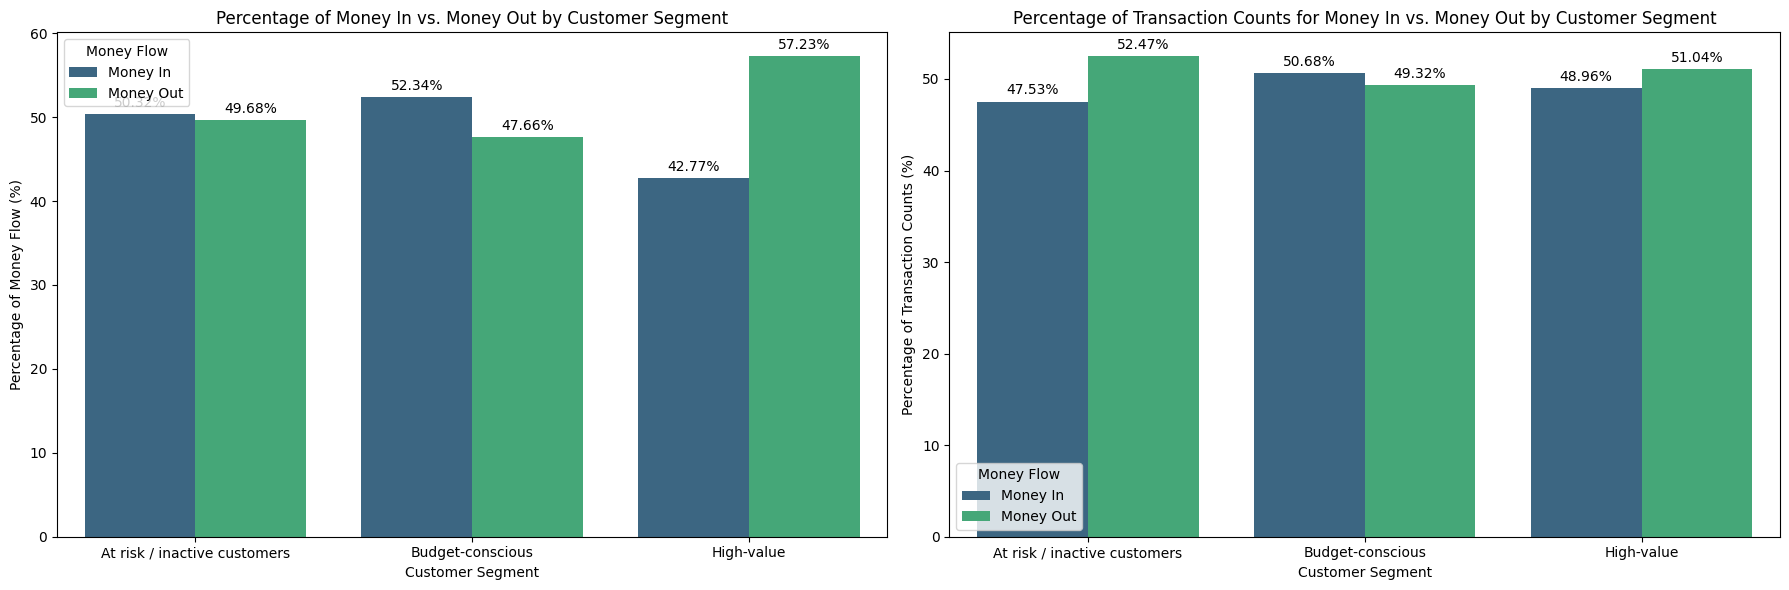

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# bar plot for the percentage of money in vs. money out by segment
sns.barplot(data=money_summary, x='Segment', y='percentage', hue='money_flow', palette='viridis', ax=ax[0])

for container in ax[0].containers:
    ax[0].bar_label(container, fmt='%.2f%%', padding=3)

ax[0].set_xlabel('Customer Segment')
ax[0].set_ylabel('Percentage of Money Flow (%)')
ax[0].set_title('Percentage of Money In vs. Money Out by Customer Segment')
ax[0].legend(title='Money Flow')

# bar plot for the percentage of transaction counts for money in vs. money out by segment
sns.barplot(data=flow_percent_melted, x='Segment', y='percentage', hue='money_flow', palette='viridis', ax=ax[1])

for container in ax[1].containers:
    ax[1].bar_label(container, fmt='%.2f%%', padding=3)

ax[1].set_xlabel('Customer Segment')
ax[1].set_ylabel('Percentage of Transaction Counts (%)')
ax[1].set_title('Percentage of Transaction Counts for Money In vs. Money Out by Customer Segment')
ax[1].legend(title='Money Flow')

plt.tight_layout()
plt.show()

**Summary of key findings:**

- High-value customers lead in transaction frequency and value, reflecting premium financial activity. 

- Budget-conscious users show moderate engagement with balanced money flow, indicating stable budgeting. 

- At-risk customers exhibit minimal activity and skewed outflows, signaling financial stress.  

Prioritization of loyalty incentives for high-value clients, promotion of savings tools for budget-conscious users, and offering debt relief programs for at-risk segments can help to enhance retention and financial health.

#### **Digital Engagement Across Customer Segments**

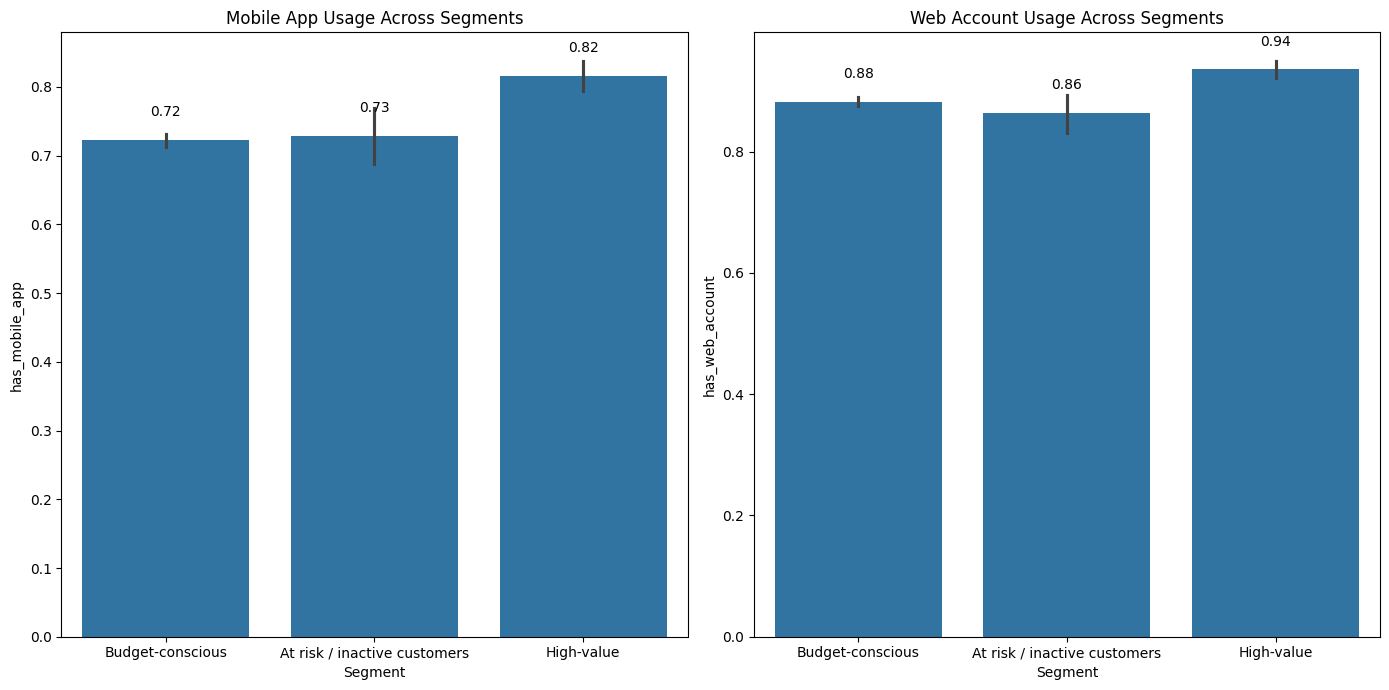

In [54]:
# barplot of the engagement rate for each segment
fig, ax = plt.subplots(1, 2, figsize=(14, 7))
sns.barplot(x='Segment', y='has_mobile_app', data=df, ax=ax[0])
ax[0].set_title('Mobile App Usage Across Segments')

for p in ax[0].patches:
    ax[0].annotate(f'{p.get_height():.2f}', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   color='black', fontsize=10, 
                   xytext=(0, 20), textcoords='offset points')

sns.barplot(x='Segment', y='has_web_account', data=df, ax=ax[1])
ax[1].set_title('Web Account Usage Across Segments')

for p in ax[1].patches:
    ax[1].annotate(f'{p.get_height():.2f}', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   color='black', fontsize=10, 
                   xytext=(0, 20), textcoords='offset points')

plt.tight_layout()
plt.show()

In [55]:
# grouping by segment and computing the most recent usage date
recency_metrics = df.groupby('Segment').agg({
    'last_mobile_use': 'max',
    'last_web_use': 'max'
})

print(recency_metrics)

                             last_mobile_use last_web_use
Segment                                                  
At risk / inactive customers      2024-11-29   2024-12-31
Budget-conscious                  2024-12-31   2024-12-31
High-value                        2024-12-30   2024-12-31


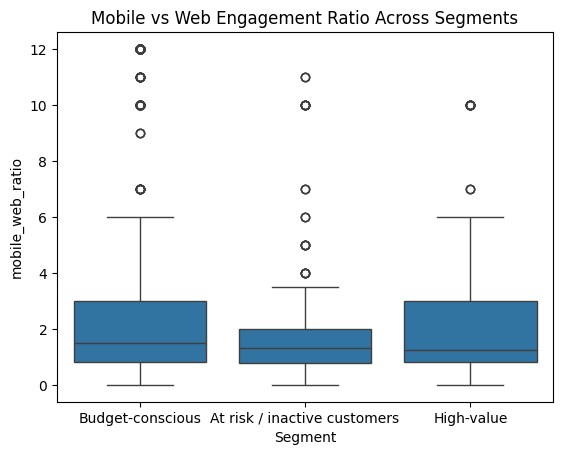

In [56]:
# boxplot of mobile and web engagement ratio across segments
df['mobile_web_ratio'] = df['mobile_logins_wk'] / (df['web_logins_wk'])
sns.boxplot(x='Segment', y='mobile_web_ratio', data=df)
plt.title('Mobile vs Web Engagement Ratio Across Segments')
plt.show()

In [57]:
# identifying inactive users (no mobile or web logins)
inactive_users = df[(df['mobile_logins_wk'] == 0) & (df['web_logins_wk'] == 0)]
inactive_by_segment = inactive_users.groupby('Segment').size()
print(inactive_by_segment)

Segment
Budget-conscious    57
dtype: int64


**Summary of key insights:**  

- High-value customers show the highest mobile app engagement and mobile-web ratio, indicating strong digital adoption. 

- Budget-conscious users have moderate engagement but include inactive users requiring re-engagement. 

- At-risk/inactive customers lag in mobile activity and show older mobile logins.  

Prioritizing mobile-exclusive perks for high-value clients, incentivizing app logins for budget-conscious inactive users, and simplifying digital tools for at-risk segments can help to boost engagement.

#### **Targeted Marketing Approaches for each Customer Segment**

High-value customers drive growth, budget-conscious need stability, and at-risk segments require urgent support to prevent churn.

**1. High-Value Customers**  

Objective: Retain loyalty, deepen engagement, and cross-sell premium products.  

Advocacy:  
- Launch a referral programme (e.g. reward promoters with travel miles or cashback for referrals).  
- Convert passives with exclusive wealth management perks (e.g. priority access to financial advisors).  

Product Strategy:  
- Promote asset-building products (e.g. mortgages, business loans) and insurance bundles (life + property insurance).  
- Cross-sell miscellaneous loans (e.g. luxury travel financing) to cater to diverse needs.  

Digital Engagement:  
  - Offer app-exclusive deals (e.g. lower interest rates for investments made via mobile).  
  - Highlight real-time portfolio tracking and premium features in-app.  

**2. Budget-Conscious Customers**  

Objective: Reduce dissatisfaction, improve financial stability, and incentivize savings.  

Address Pain Points:  
- Target detractors with cost-saving tools (e.g. fee waivers for maintaining a savings balance).  
- Offer debt consolidation loans and cashback on essential spending (groceries, utilities).  

Product Strategy:  
- Promote fixed deposits with higher interest rates for consistent savers.  
- Introduce low-risk investment products (e.g. index funds) via email/SMS campaigns.  

Digital Engagement:  
- Re-engage inactive users with login rewards (e.g. $5 bonus for weekly app logins).  
- Simplify budgeting tools on mobile/web for easier debt management.  

**3. At-Risk/Inactive Customers**  

Objective: Mitigate financial strain, rebuild trust, and reactivate engagement. 

Crisis Interventions:  
- Provide debt relief programs (e.g. interest-free grace periods, restructuring).  
- Offer free financial counseling (e.g. credit score workshops via webinars).  

Product Strategy:  
- Push debt management tools (e.g. automated payment reminders with fee waivers).  
- Simplify product terms (e.g. no-fee basic accounts) to reduce complexity.  

Digital Engagement:  
- Streamline mobile/web interfaces for easier navigation (e.g. one-click payment options).  
- Trigger reactivation campaigns (e.g. "We miss you" SMS with small-balance loan offers).  

**Cross-Segment Priorities**  
- Passive Customers:  
  - All Segments: Offer tiered incentives (e.g. cashback for increased transaction frequency).  
- Underutilized Products:  
  - Test lifestyle/personal loan promotions.  